# ESERCIZIO 1
Provare con due matrici con lo stesso *stiffness ratio* ma con $\lambda_{min}$ diversi in ordine di grandezza.

Lo stiffness ratio non è l'unico che determina lo stiffness.


Porre ad esempio i valori di *stiffness ratio* e autovalori massimo e minimo della seguente cella.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
stiff_ratio = 10000. ;   # = lmax/lmin

caso=2
if caso==1:
    lmin = -0.01  # non oscilla
else:
    lmin = -1
lmax = lmin * stiff_ratio

lambda1 = lmin
lambda2 = lmax
A = np.array([[(lambda1+lambda2)/2,(lambda1-lambda2)/2],[(lambda1-lambda2)/2,(lambda1+lambda2)/2]]);
print("Autovalori della matrice A : " ,np.linalg.eig(A)[0])

Autovalori della matrice A :  [-1.e+00 -1.e+04]


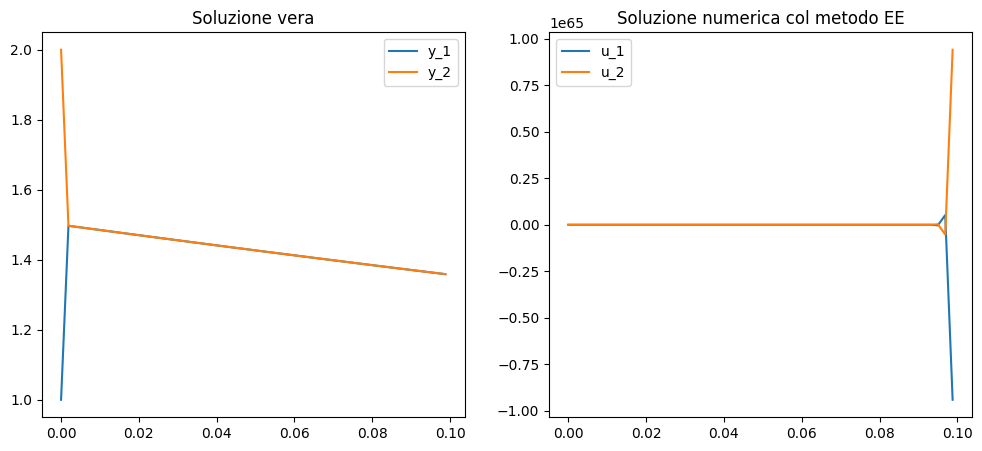

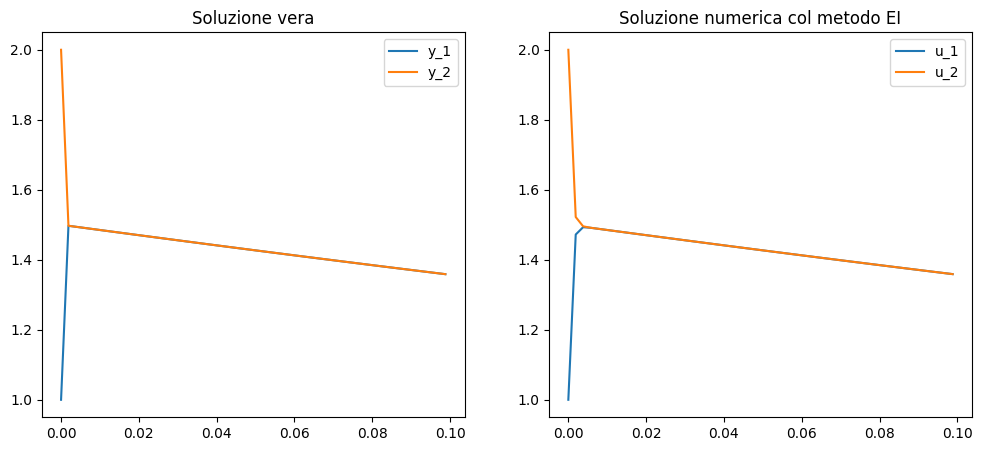

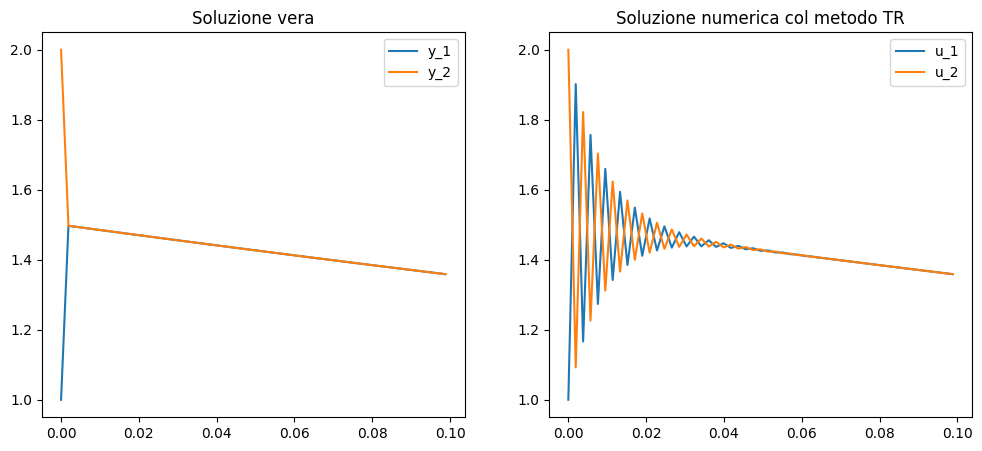

In [3]:
# Problema TEST:
f = lambda t,y: A @ y

tf = 0.1
h = 0.0019;     # EE converge essendo h < 2/|lambda2|
# h = 0.0021;   # EE non converge essendo h > 2/|lambda2| 
times = np.arange(0,tf,h)
C_1 = 3/2
C_2 = -1/2
sol_vera_y1 = C_1*np.exp(lambda1*times)+C_2*np.exp(lambda2*times)
sol_vera_y2 = C_1*np.exp(lambda1*times)-C_2*np.exp(lambda2*times)


for metodo in ['EE','EI','TR']:
    u = np.zeros((2,len(times)))
    u_n = np.array([1,2])
    u[:,0] = u_n
    
    for i in range(0,len(times)-1):
        if metodo == 'EE':
            u_n1 = u_n + h*f(times[i],u_n)
            u[:,i+1] = u_n1
            u_n=u_n1 

        elif metodo == 'EI':
            Opt_sol = optimize.root(lambda u_n1 :  u_n1 - h*f(times[i+1],u_n1) - u_n , u_n)
            u_n1 = Opt_sol.x

        else:
            Opt_sol = optimize.root(lambda u_n1 :  u_n1 - h*0.5*(f(times[i+1],u_n1)+f(times[i],u_n)) - u_n, u_n)
            u_n1 = Opt_sol.x

        u[:,i+1] = u_n1
        u_n=u_n1

    plt.figure(figsize=(12,5));  plt.subplot(1,2,1)
    plt.plot(times, sol_vera_y1,label='y_1');  plt.plot(times, sol_vera_y2,label='y_2'); plt.legend(); plt.title('Soluzione vera')
    plt.subplot(1,2,2);
    plt.plot(times, np.array(u[0,:]),label='u_1'); plt.plot(times, np.array(u[1,:]),label='u_2')
    plt.legend(); plt.title('Soluzione numerica col metodo %s' %metodo)
# end for on methods